<a href="https://colab.research.google.com/github/Ana1Pau/Kaggle/blob/main/Chennai_Water_Management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import io
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [86]:
res = pd.read_csv('chennai_reservoir_levels.csv') #Load Chennai Res Dataset 
res.head()                      #Print first 5 rows of the dataset 

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
0,01-01-2004,3.9,0.0,268.0,0.0
1,02-01-2004,3.9,0.0,268.0,0.0
2,03-01-2004,3.9,0.0,267.0,0.0
3,04-01-2004,3.9,0.0,267.0,0.0
4,05-01-2004,3.8,0.0,267.0,0.0


In [87]:
#Updating info coming from the dataset
#Converting date to datetime object
res.Date=pd.to_datetime(res.Date,format="%d-%m-%Y")
#Date is set as current index
res.index=res.Date
#Dropping old Date column 
res=res.drop(['Date'],axis=1)

In [88]:
res.head() #Reservoir table updated 

,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
Date,,,,
2004-01-01,3.9,0.0,268.0,0.0
2004-01-02,3.9,0.0,268.0,0.0
2004-01-03,3.9,0.0,267.0,0.0
2004-01-04,3.9,0.0,267.0,0.0
2004-01-05,3.8,0.0,267.0,0.0


In [ ]:
#1.Visualize the water need/usage of the  city graphic
#A line chart is convinient ot visualize data

Text(0, 0.5, 'Reservoir in mcft')

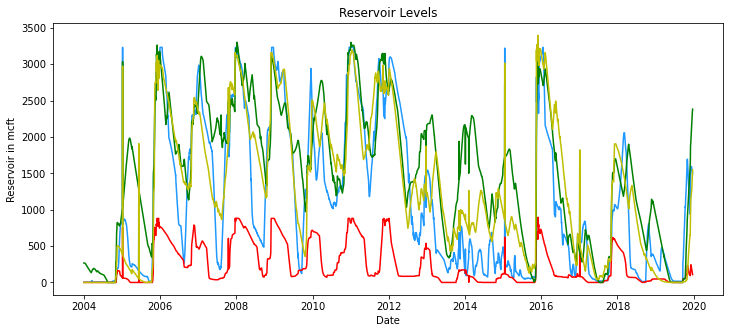

In [98]:
1.#Plotting the water need/usage of the city in different locations

plt.figure(figsize=(12,5))    #Set size of the plot
plt.plot(res.POONDI,color='#1f99ff',label="Poondi") 
plt.plot(res.CHOLAVARAM,color='r',label="Chola")
plt.plot(res.REDHILLS,color='g',label="RedHills")
plt.plot(res.CHEMBARAMBAKKAM,color='y',label="Chembar")
plt.title("Reservoir Levels")
plt.xlabel("Date")
plt.ylabel("Reservoir in mcft")

In [90]:
rain = pd.read_csv('chennai_reservoir_rainfall.csv') #Load Chennai Res_Rainfall Dataset 
rain.head()

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
0,01-01-2004,0.0,0.0,0.0,0.0
1,02-01-2004,0.0,0.0,0.0,0.0
2,03-01-2004,0.0,0.0,0.0,0.0
3,04-01-2004,0.0,0.0,0.0,0.0
4,05-01-2004,0.0,0.0,0.0,0.0


In [91]:
#Updating info coming from the dataset
#Converting date to datetime object
rain.Date=pd.to_datetime(rain.Date,format="%d-%m-%Y")
#Date is set as current index
rain.index=rain.Date
#Dropping old Date column 
rain=rain.drop(['Date'],axis=1)

In [92]:
rain.head() #Reservoir table updated 

,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
Date,,,,
2004-01-01,0.0,0.0,0.0,0.0
2004-01-02,0.0,0.0,0.0,0.0
2004-01-03,0.0,0.0,0.0,0.0
2004-01-04,0.0,0.0,0.0,0.0
2004-01-05,0.0,0.0,0.0,0.0


Text(0, 0.5, 'Rainfail in mcft')

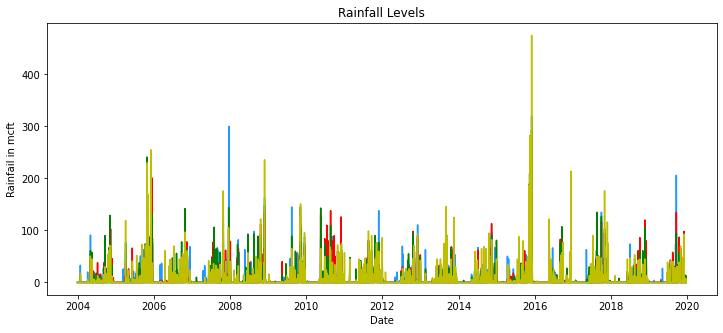

In [99]:
#Rainfall Levels in the city in different locations
plt.figure(figsize=(12,5)) #Set size of the plot
plt.plot(rain.POONDI,color='#1f99ff',label="Poondi")
plt.plot(rain.CHOLAVARAM,color='r',label="Chola")
plt.plot(rain.REDHILLS,color='g',label="RedHills")
plt.plot(rain.CHEMBARAMBAKKAM,color='y',label="Chembar")
plt.title("Rainfall Levels")
plt.xlabel("Date")
plt.ylabel("Rainfail in mcft")

In [104]:
#Create a column Date grouping from index
rain['Date']=rain.index
#Creating columns: year and month and Grouping relevant info by using a lambda and map function.
rain['year']=rain.Date.map(lambda x:x.year)
rain['month']=rain.Date.map(lambda x:x.month)

In [105]:
rain.head() #Rain table updated 

,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM,Date,year,month
Date,,,,,,,
2004-01-01,0.0,0.0,0.0,0.0,2004-01-01,2004,1
2004-01-02,0.0,0.0,0.0,0.0,2004-01-02,2004,1
2004-01-03,0.0,0.0,0.0,0.0,2004-01-03,2004,1
2004-01-04,0.0,0.0,0.0,0.0,2004-01-04,2004,1
2004-01-05,0.0,0.0,0.0,0.0,2004-01-05,2004,1


In [106]:
#Create a column with the mean value from rainfalls in different zones of Chennai City.
rain['Mean']=(rain.POONDI+rain.CHOLAVARAM+rain.REDHILLS+rain.CHEMBARAMBAKKAM)/4

In [118]:
rain.head() #Rain table updated 

,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM,Date,year,month,Mean
Date,,,,,,,,
2004-01-01,0.0,0.0,0.0,0.0,2004-01-01,2004,1,0.0
2004-01-02,0.0,0.0,0.0,0.0,2004-01-02,2004,1,0.0
2004-01-03,0.0,0.0,0.0,0.0,2004-01-03,2004,1,0.0
2004-01-04,0.0,0.0,0.0,0.0,2004-01-04,2004,1,0.0
2004-01-05,0.0,0.0,0.0,0.0,2004-01-05,2004,1,0.0


In [119]:
#2.Identify whether the water sources availability will be able to meet the needs till the
#subsequent monsoon.....prediction ML
#Group Mean Rainfall per year
total_annual_rainfall=rain.groupby(['year'])['Mean'].sum()

Text(0.5, 1.0, 'Yearly Mean Rain')

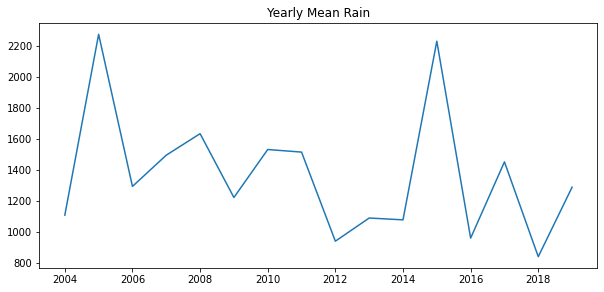

In [120]:
#Plot Mean Rainfall per year
plt.figure(figsize=(10,4.5))
plt.plot(total_annual_rainfall)
plt.title("Yearly Mean Rain")

Text(0.5, 1.0, 'Rainfall Per year')

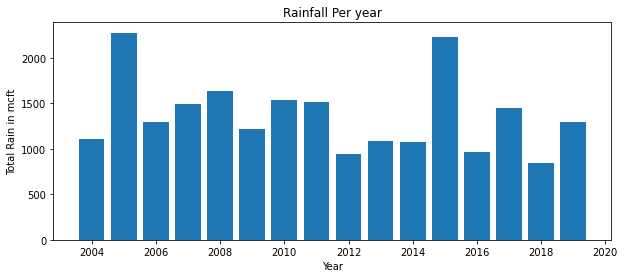

In [121]:
#3.How bad is the current water crisis compared to previous years?
#A column chart is used to show a comparison among different items,
#or it can show a comparison of items over time. 
#Plot Mean Rainfall per year
plt.figure(figsize=(10,4))
plt.bar(total_annual_rainfall.index,total_rainfall_annual)
plt.xlabel('Year')
plt.ylabel("Total Rain in mcft")
plt.title("Rainfall Per year")

In [125]:
res['Date']=res.index
#Creating columns: year and month and Grouping relevant info by using a lambda and map function.
res["month"]=res.Date.map(lambda x: x.month)
res["year"]=res.Date.map(lambda x: x.year)

In [126]:
#Get the average water reservoirs in Chennai 
res["mean"]=(res['POONDI']+res['CHOLAVARAM']\
            +res['REDHILLS']+res['CHEMBARAMBAKKAM'])/4


In [127]:
#Group average Water reservoirs per Year 
avg_water=res.groupby(["year"])['mean'].mean()

Text(0, 0.5, 'Year')

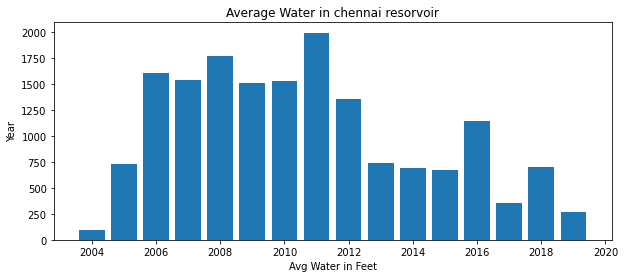

In [128]:
#Plot average Water in Chennai reservoir per year
plt.figure(figsize=(10,4))
plt.bar(avg_water.index,avg_water)
plt.title("Average Water in chennai resorvoir")
plt.xlabel("Avg Water in Feet")
plt.ylabel("Year")